# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [0]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [0]:
def max_element(arr):
    result = x[1:][x[:-1] == 0]
    if result.size == 0:
        return None
    else:
        return result.max()

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [0]:
def nearest_value(X, v):
    return X.reshape(-1)[np.argmin(abs(X - v))]

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [0]:
def scale(X):
    X = X - np.mean(X, axis = 0)
    std = np.std(X)
    if std != 0:
        return X/np.std(X)
    else:
        return None

X = np.random.randint(5, size=(3, 3))
print(X)
print(scale(X))

[[2 2 0]
 [4 3 3]
 [4 4 4]]
[[-1.09544512 -0.82158384 -1.91702895]
 [ 0.54772256  0.          0.54772256]
 [ 0.54772256  0.82158384  1.36930639]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [0]:
def get_stats(X):
    print(np.linalg.det(X))
    print(np.trace(X))
    print(X.min(), X.max())
    print(np.linalg.norm(X, 'fro'))
    print(np.linalg.eigvals(X))
    print(np.linalg.inv(X))
    
N = 1 * np.random.randn(3, 3) + 10
print(N)
get_stats(N)

X = np.empty(100) # для следующего задания

[[  9.20257601   8.74767304   7.59789149]
 [ 10.15758808   9.33816434   9.8288341 ]
 [ 10.58207757   9.41026999  11.40669324]]
0.815032162407
29.9474335896
7.59789148821 11.4066932372
28.9234719559
[  2.87056359e+01   2.33014733e-02   1.21849624e+00]
[[ 17.20863813 -34.70269522  18.43984619]
 [-14.54544611  30.14541706 -16.28689209]
 [ -3.96491495   7.32465557  -3.58279389]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [0]:
for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    X[exp_num - 1] = A.dot(B).max()
print(np.mean(X))
print(np.percentile(X, 95))

8.40213171574
11.8743005818


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [0]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [0]:
data = pd.read_csv('2008.csv')
#data = data[(data.Month >= 1) & (data.Month <= 4)] - на случай, если данные нужно брать действительно только за 4 месяца
print(data['CancellationCode'].value_counts().idxmax())

A


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [0]:
print(data['Distance'].mean(), data['Distance'].min(), data['Distance'].max())

724.5082571428571 31 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [0]:
print(data[data.Distance == data.Distance.min()][['Month', 'DayofMonth', 'FlightNum', 'Origin', 'Dest']])
weird_flight_numbers = data[data.Distance == data.Distance.min()]['FlightNum']
weird_data = data[data.FlightNum.isin(weird_flight_numbers) == True & (data.Distance != data.Distance.min())]
print(weird_data.groupby('FlightNum')['Distance'].value_counts())

       Month  DayofMonth  FlightNum Origin Dest
1116      12          30         65    WRG  PSG
6958      12          26         65    WRG  PSG
17349      8          18         64    PSG  WRG
27534      3          11         64    PSG  WRG
46082      8           9         65    WRG  PSG
48112      2          28         64    PSG  WRG
FlightNum  Distance
64         1747        6
           82          5
           1005        5
           123         4
           533         4
           571         3
           680         3
           2381        2
           359         1
           372         1
           414         1
           883         1
65         82          6
           1747        6
           581         4
           1005        4
           372         3
           571         3
           2454        3
           123         2
           680         2
           281         1
           386         1
           682         1
Name: Distance, dtype: int64


<img src = "https://pp.vk.me/c638918/v638918390/4c16/UXP6yu3qEts.jpg">

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [0]:
airport_data = pd.read_csv('airports.csv')
iata_code = data['Origin'].value_counts().idxmax()
print(iata_code)
print(airport_data[airport_data.iata == iata_code]['city'].values)

ATL
['Atlanta']


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [0]:
air_time = data.groupby('Origin')['AirTime'].mean()
print(air_time.idxmax())

SJU


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [0]:
new_data = data.groupby('Origin').filter(lambda x: x['Origin'].value_counts() >= 1000)
print((new_data['Origin'][new_data.DepDelay > 0].value_counts()/new_data['Origin'].value_counts()).idxmax())

EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [0]:
data = pd.read_csv('2008.csv')
print('-', data.isnull().any().any())
print('-', data.isnull().sum().sum())
print('-', data.isnull().any(1).sum())
print('-', data.isnull().any().sum())

- True
- 355215
- 70000
- 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [0]:
print('-', data['DepDelay'].isnull().any(), '\n')
data_without_target = data[data.DepDelay.isnull()]

mis_feat = data_without_target.iloc[0, data_without_target.isnull().any().nonzero()].index.values
part_mis_feat = data_without_target[mis_feat].iloc[0, data_without_target[mis_feat].notnull().any().nonzero()].index.values
print('Missing features in our data without target variable: ')
print(mis_feat, '\n')
print('Patially missing features in our data without target variable: ')
print(part_mis_feat)

data[data.Cancelled == 1 & data.DepDelay.notnull()][mis_feat]

- True 

Missing features in our data without target variable: 
['DepTime' 'ArrTime' 'TailNum' 'ActualElapsedTime' 'CRSElapsedTime'
 'AirTime' 'ArrDelay' 'DepDelay' 'TaxiIn' 'TaxiOut' 'CarrierDelay'
 'WeatherDelay' 'NASDelay' 'SecurityDelay' 'LateAircraftDelay'] 

Patially missing features in our data without target variable: 
['TailNum' 'CRSElapsedTime']


,DepTime,ArrTime,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5976,1325.0,NaN,N636AS,NaN,53.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15680,954.0,NaN,N21537,NaN,137.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16382,1806.0,NaN,N288SW,NaN,59.0,NaN,NaN,38.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN
20622,844.0,NaN,N505MJ,NaN,114.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22462,2132.0,NaN,N17231,NaN,58.0,NaN,NaN,-2.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN
30057,1358.0,NaN,N506CA,NaN,150.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33611,826.0,NaN,N437SW,NaN,165.0,NaN,NaN,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37581,2234.0,NaN,N560SW,NaN,43.0,NaN,NaN,-1.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN
40343,1440.0,NaN,N921EV,NaN,106.0,NaN,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50401,2232.0,NaN,N750SK,NaN,97.0,NaN,NaN,-2.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN


Итак, мы видим, что все авиарейсы с отсутствющим значением 'DepDelay' были отменены (в связи с чем у них отсутствуют значения таких связанных с полетом признаков, как время вылета, время прибытия, действительное время полета и проч.). Тем не менее, существует 12 авиарейсов, которые были отменены ('Cancelled' value = 1), но целевая переменная присутствует. В отличие от объектов с отсутствующим значением целевой переменной, у них у всех присутствует время вылета (а так же бортовой номер и ожидаемое время полета - хотя эти два признака частично присутствуют при 'DepDelay' = NaN), но так же отсутствует время прибытия и действительное время полета. Таким образом, несмотря на присутствие значения целевого признака, принимая во внимание малую долю таких объектов и ошибочность данных (полеты были отменены, а не задержаны), можно исключить из рассмотрения признаки 'Cancelled' и 'CancellationCode', а так же эти 12 авиарейсов (считая значение 'DepDelay' для них некорректным - должно отсутствовать) - таким образом, значение 'Cancelled' у всех интересующих нас объектов будет равно 0.

In [0]:
data = data[data.DepDelay.notnull() & (data.DepDelay != 0) & (data.Cancelled != 1)]
data.drop(['Cancelled', 'CancellationCode'], axis = 1, inplace = True)

depdelay = data['DepDelay']
data.drop('DepDelay', axis = 1, inplace = True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [0]:
def get_hours(time):
    return time//100
def get_minutes(time):
    return time%100

hours = data[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].apply(get_hours)
minutes = data[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].apply(get_minutes)
data[['DepTime_Hour', 'CRSDepTime_Hour', 'ArrTime_Hour', 'CRSArrTime_Hour']] = hours
data[['DepTime_Minute', 'CRSDepTime_Minute', 'ArrTime_Minute', 'CRSArrTime_Minute']] = minutes
data.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [0]:
def minutes(hours, minutes):
    return 60*hours + minutes

# явное вычисление задержки отправления ('DepDelay'), при проверке учтем случай 'перехода' через сутки
diff_crs_dep = minutes(data.DepTime_Hour, data.DepTime_Minute) - minutes(data.CRSDepTime_Hour, data.CRSDepTime_Minute)

# проверка зависимости на объектах выборки
print(((diff_crs_dep == depdelay) | (abs(diff_crs_dep - depdelay) == 1440.0)).unique())

# еще одно явное вычисление задержки отправления
diff_crs_elaps = data.CRSElapsedTime - (data.ActualElapsedTime - data.ArrDelay)

# проверка зависимости на объектах выборки
print(((diff_crs_elaps == depdelay) | data.ActualElapsedTime.isnull()).unique())

# поиск признаков, сильно коррелирующих с ответами 
# (будем считать значение коэффициента корреляции, большее 90%, достаточным основанием для удаления признака)
for col in data.columns:
    if data[col].dtype != 'object' and data[col].corr(depdelay) > 0.9:
        print(col, data[col].corr(depdelay))

# явное вычисление задержки прибытия, при проверке учтем случай 'перехода' через сутки
diff = minutes(data.ArrTime_Hour, data.ArrTime_Minute) - minutes(data.CRSArrTime_Hour, data.CRSArrTime_Minute)

# проверка зависимости на объектах выборки
print(((diff == data.ArrDelay) | (abs(diff - data.ArrDelay) == 1440.0) | data.ArrDelay.isnull()).unique())

[True]
[True]
ArrDelay 0.933525938482
[True]


Заметим, что одновременное наличие таких признаков, как:
* DepTime и CRSDepTime (их производных Hour и Minute)
* ActualElapsedTime, CRSElapsedTime и ArrDelay

приводит к явной зависимости от ответа (т. е. позволяет получать значение целевой переменной, что не допускает такой характеристики поставленной задачи как "предсказание")

Также заметим, что найденный нами сильно коррелирующий с ответом признак ArrDelay явно выражается через значения признаков:
* ArrTime и CRSArrTime (их производных Hour и Time)

Несмотря на проделанную поиск по выявлению признаков, содержащих большую долю информации о значении целевой переменной, существует еще одна корреляция, основанная на данных датасета (все предыдущие зависимости очевидным образом следуют из свойств имеющихся признаков, что и позволяло проверить эту зависимость для всех объектов). Это сумма всех 'Cause of Delay' (http://www.transtats.bts.gov/Fields.asp?Table_ID=236) - коэффициент корреляции с ответом оказывается больше 90%:

In [0]:
sum = (data['CarrierDelay'] + data['WeatherDelay'] + data['NASDelay'] + data['SecurityDelay'] + data['LateAircraftDelay'])
print(sum.corr(depdelay))

0.932965824381


Таким образом, у нас возникает большой выбор признаков, необходимых для удаления в связи со значимым влиянием на прогноз:
* (DepTime_Hour и DepTime_Minute) или (CRSDepTime_Hour и CRSDepTime_Minute)
* ActualElapsedTime, CRSElapsedTime или ArrDelay
* ArrDelay
* (ArrTime_Hour и ArrTime_Minute) или (CRSArrTime_Hour и CRSArrTime_Minute)

Исключим признаки, связанные с запланированными данными, и уберем один из признаков 'Cause of Delay' - например, 'CarrierDelay' (проверим, что полученная сумма с ответом коррелирует уже не сильно):

In [0]:
sum = (data['WeatherDelay'] + data['NASDelay'] + data['SecurityDelay'] + data['LateAircraftDelay'])
print(sum.corr(depdelay))

data.drop(['CRSDepTime_Hour', 'CRSDepTime_Minute', 'CRSElapsedTime'], axis = 1, inplace = True)
data.drop(['ArrDelay', 'CRSArrTime_Hour', 'CRSArrTime_Minute'], axis = 1, inplace = True)
data.drop(['CarrierDelay'], axis = 1, inplace = True)

data.drop(['Year', 'TailNum'], axis = 1, inplace = True)

0.635820351184


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

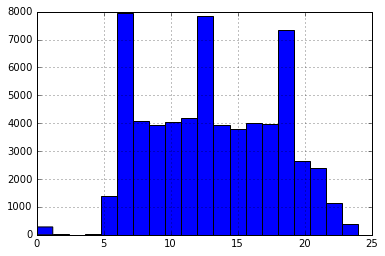

In [0]:
data['DepTime_Hour'].hist(bins=20)

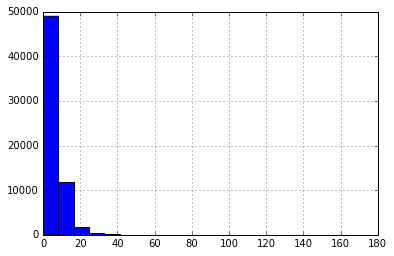

In [0]:
data['TaxiIn'].hist(bins=20)

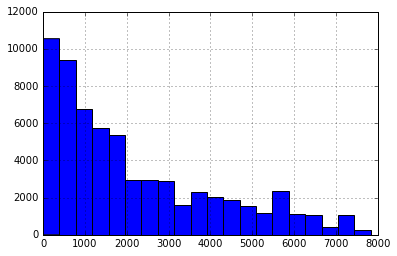

In [0]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Признаки будут вносить неодинаковый вклад - например, номер полета при обучении линейной регрессии будет влиять на целевую переменную гораздо сильнее, чем значения признаков 'DepTime_Hour' и 'TimeIn', которые оказываются сильно меньше соответствующих значений признака 'FlightNum'. Масштабирование поможет принять во внимание все признаки. Более того, отсутствие нормализации усложняет метод градиентного спуска (скорость сходимости метода значительно уменьшается), делая его при неаккуратном выборе длины шага непродуктивным.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [1]:
def transform_data(data):
    from sklearn.preprocessing import StandardScaler

    categorical_features = (data.dtypes == "object").values

    cat_data = data[data.columns[categorical_features]].fillna(value = 'nan')
    noncat_data = data[data.columns[~categorical_features]].fillna(value = 0)

    noncat_data_norm_np = StandardScaler().fit_transform(noncat_data)
    noncat_data_norm = pd.DataFrame(data = noncat_data_norm_np, index = data.index, 
                                    columns = data.columns[~categorical_features])
    cat_data_hot = pd.get_dummies(cat_data)
    
    return pd.concat([noncat_data_norm, cat_data_hot], axis = 1, ignore_index = True)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [0]:
data = transform_data(data)
print("Count of features:", data.columns.values.size)

Count of features: 632


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [0]:
from sklearn.cross_validation import train_test_split

data_train, data_test, depdelay_train, depdelay_test = train_test_split(data, depdelay, test_size = 0.3)
print('train size:', data_train.index.values.size)
print('test size:', data_test.index.values.size)

train size: 44374
test size: 19018


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

part_coef = 1000

part_train = data_train[:part_coef]
part_y_train = depdelay_train[:part_coef]

LR = LinearRegression().fit(part_train, part_y_train)
print('MSE on small part of train:',
      mean_squared_error(y_true = part_y_train, y_pred = LR.predict(part_train)))
print('R^2 on small part of train:',
      LR.score(part_train, part_y_train))

print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = LR.predict(data_test)))
print('R^2 on test:', LR.score(data_test, depdelay_test))
print('\n')

pd.options.display.max_rows = 1000
print(pd.DataFrame({'features': data.columns.values, 'weights': LR.coef_}).describe())

MSE on small part of train: 201.108352173
R^2 on small part of train: 0.829739417728
MSE on test: 1.12693157192e+25
R^2 on test: -8.46348241654e+21


         features       weights
count  632.000000  6.320000e+02
mean   315.500000 -1.548756e+12
std    182.586966  5.110602e+12
min      0.000000 -2.608872e+13
25%    157.750000 -2.019772e+12
50%    315.500000 -1.971285e+12
75%    473.250000  0.000000e+00
max    631.000000  7.322977e+13


Уже на 1000 объектах (из 44382) нашей обучающей выборки линейная регрессия переобучается, выдавая хороший результат на самих объектах, выбранных для обучения, но очень плохой на контрольной выборке.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [0]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import KFold

LR = LinearRegression().fit(part_train, part_y_train)
print('LR, trained on small part of train:')
print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = LR.predict(data_test)))
print('R^2 on test:', LR.score(data_test, depdelay_test))
print('\n')

LR = LinearRegression().fit(data_train, depdelay_train)
print('LR, trained on a data_train:')
print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = LR.predict(data_test)))
print('R^2 on test:', LR.score(data_test, depdelay_test))
print('\n')

lasso_cv = LassoCV(cv = 5).fit(part_train, part_y_train)
print('Lasso, trained on small part of train:')
print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = lasso_cv.predict(data_test)))
print('R^2 on test:', lasso_cv.score(data_test, depdelay_test))
print('\n')

lasso_cv = LassoCV(cv = 5).fit(data_train, depdelay_train)
print('Lasso, trained on a data_train:')
print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = lasso_cv.predict(data_test)))
print('R^2 on test:', lasso_cv.score(data_test, depdelay_test))
print('\n')

ridge_cv = RidgeCV(cv = 5).fit(part_train, part_y_train)
print('Ridge, trained on small part of train:')
print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = ridge_cv.predict(data_test)))
print('R^2 on test:', ridge_cv.score(data_test, depdelay_test))
print('\n')

ridge_cv = RidgeCV(cv = 5).fit(data_train, depdelay_train)
print('Ridge, trained on a data_train:')
print('MSE on test:', mean_squared_error(y_true = depdelay_test, y_pred = ridge_cv.predict(data_test)))
print('R^2 on test:', ridge_cv.score(data_test, depdelay_test))

LR, trained on small part of train:
MSE on test: 1.12693157192e+25
R^2 on test: -8.46348241654e+21


LR, trained on a data_train:
MSE on test: 521.808544851
R^2 on test: 0.608111303812


Lasso, trained on small part of train:
MSE on test: 505.556842368
R^2 on test: 0.620316658745


Lasso, trained on a data_train:
MSE on test: 485.503523628
R^2 on test: 0.635377103831


Ridge, trained on small part of train:
MSE on test: 507.070422869
R^2 on test: 0.619179929392


Ridge, trained on a data_train:
MSE on test: 484.973773278
R^2 on test: 0.635774956982


In [0]:
print(((depdelay_test > 0) == (ridge_cv.predict(data_test) > 0)).sum())
print(depdelay_test.count())

10956
19018


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [0]:
s = pd.Series(list('abca'))
s = pd.get_dummies(s, sparse = True)
print(s)
print(s.to_sparse())

     a    b    c
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
3  1.0  0.0  0.0
     a    b    c
0  1.0  NaN  NaN
1  NaN  1.0  NaN
2  NaN  NaN  1.0
3  1.0  NaN  NaN


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [0]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [0]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [0]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [0]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [0]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [0]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [0]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [0]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [0]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [0]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [0]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [0]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.